# Check results from two different runs

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# QL with Sine v Cosine

## Load data

In [20]:
v1 = LatticeData(datadir = "/data_nls_sin/")
src_dir1 = "/run_7_14_23_sin/"
v1.collect_data(src_dir1)
v1label = "sin"

v2 = LatticeData(datadir = "/data_nls_cos/")
src_dir2 = "/run_7_14_23_cos/"
v2.collect_data(src_dir2)
v2label = "cos"

In [3]:
df1 = v1.do_stats(therm = 0.0)
df2 = v2.do_stats(therm = 0.0)
df1.columns = pd.MultiIndex.from_product([df1.columns, [v1label]])
df2.columns = pd.MultiIndex.from_product([df2.columns, [v2label]])
df_all = pd.concat([df1,df2])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

## Compare timing

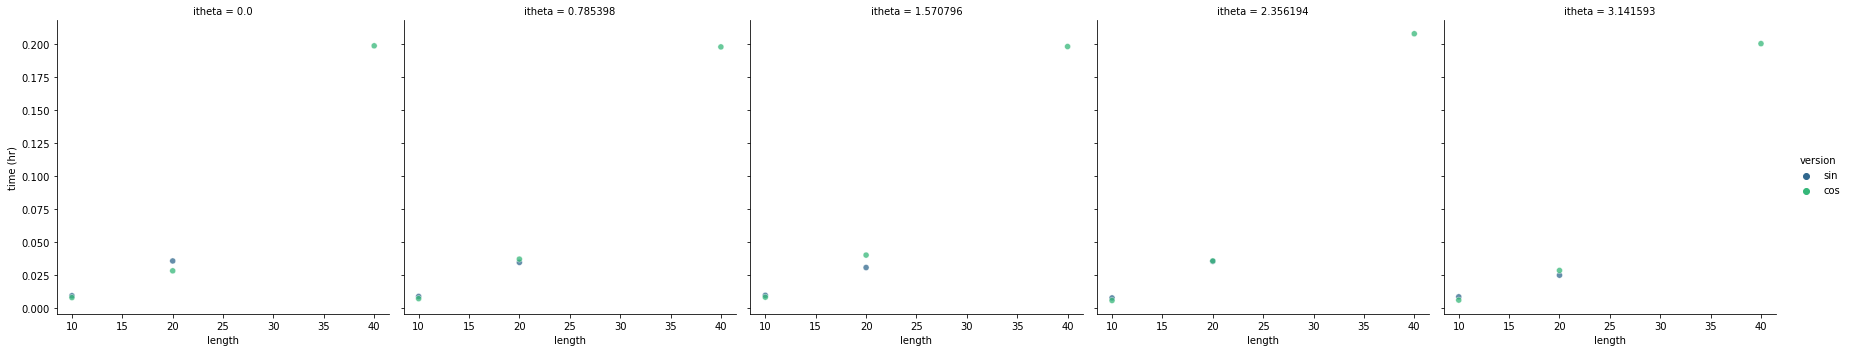

In [6]:
sns.relplot(data = df_all, x = "length", y = "time (hr)", hue = "version", 
                col = "itheta", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

## Compare Observables with RelPlot in Seaborn

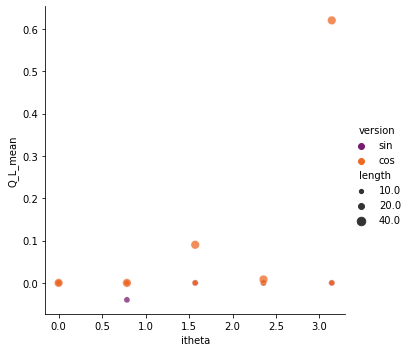

In [7]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

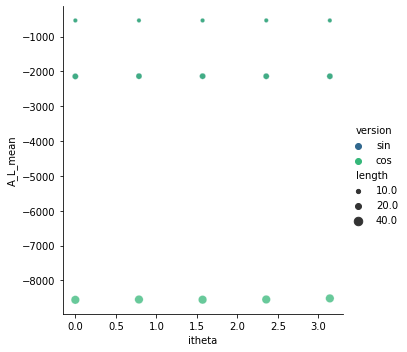

In [8]:
sns.relplot(data = df_all, x = "itheta", y = "A_L_mean", hue = "version", 
                size = "length",alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

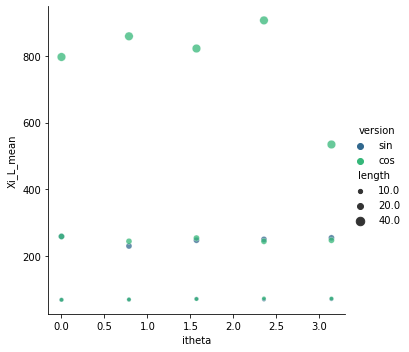

In [9]:
sns.relplot(data = df_all, x = "itheta", y = "Xi_L_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

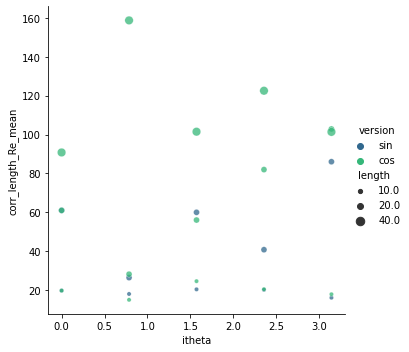

In [10]:
sns.relplot(data = df_all, x = "itheta", y = "corr_length_Re_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

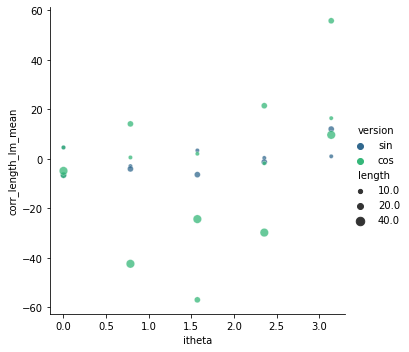

In [11]:
sns.relplot(data = df_all, x = "itheta", y = "corr_length_Im_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

## Check Observables with errorbars

In [15]:
lengths = [10,20]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

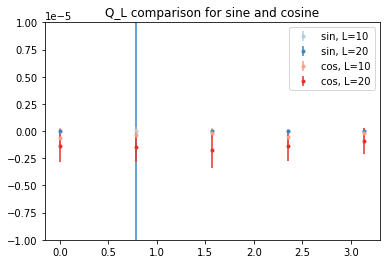

In [16]:
observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], 
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], 
                 label =v2label+", L="+str(length))
plt.legend()
plt.ylim([-0.00001,0.00001])
plt.title(observable+" comparison for sine and cosine")
plt.show()

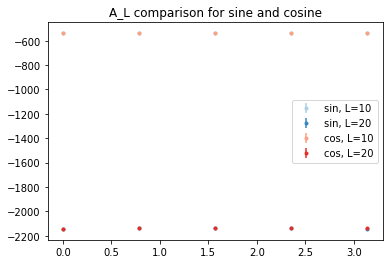

In [18]:
observable = "A_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], 
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], 
                 label =v2label+", L="+str(length))
plt.legend()
plt.title(observable+" comparison for sine and cosine")
plt.show()

# QL using cosine with and without adjustment for range

## Load data

## Compare Observables with RelPlot in Seaborn

## Compare Observables with Errorbars

# QL and AL looking for AL double-counting